# 用户指南，第8章：安装MusicXML阅读器，文件格式(1)
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_08_installingMusicXML.html)

Music21支持导入与导出多种乐谱文件格式。Music21还自带了许多以这些格式编码的音乐作品，称作乐谱库(corpus)（参见[music21.corpus](https://www.music21.org/music21docs/moduleReference/moduleCorpus.html#modulecorpus)）。

总的来说，如果要从磁盘加载一个文件，只需调用函数`music21.converter.parse()`。该函数能导入所有music21支持的文件格式（关于music21所支持的文件与数据格式的完整文档，请见[music21.converter](https://www.music21.org/music21docs/moduleReference/moduleConverter.html#moduleconverter)）。如需加载乐谱库中的文件，请使用`music21.corpus.parse()`

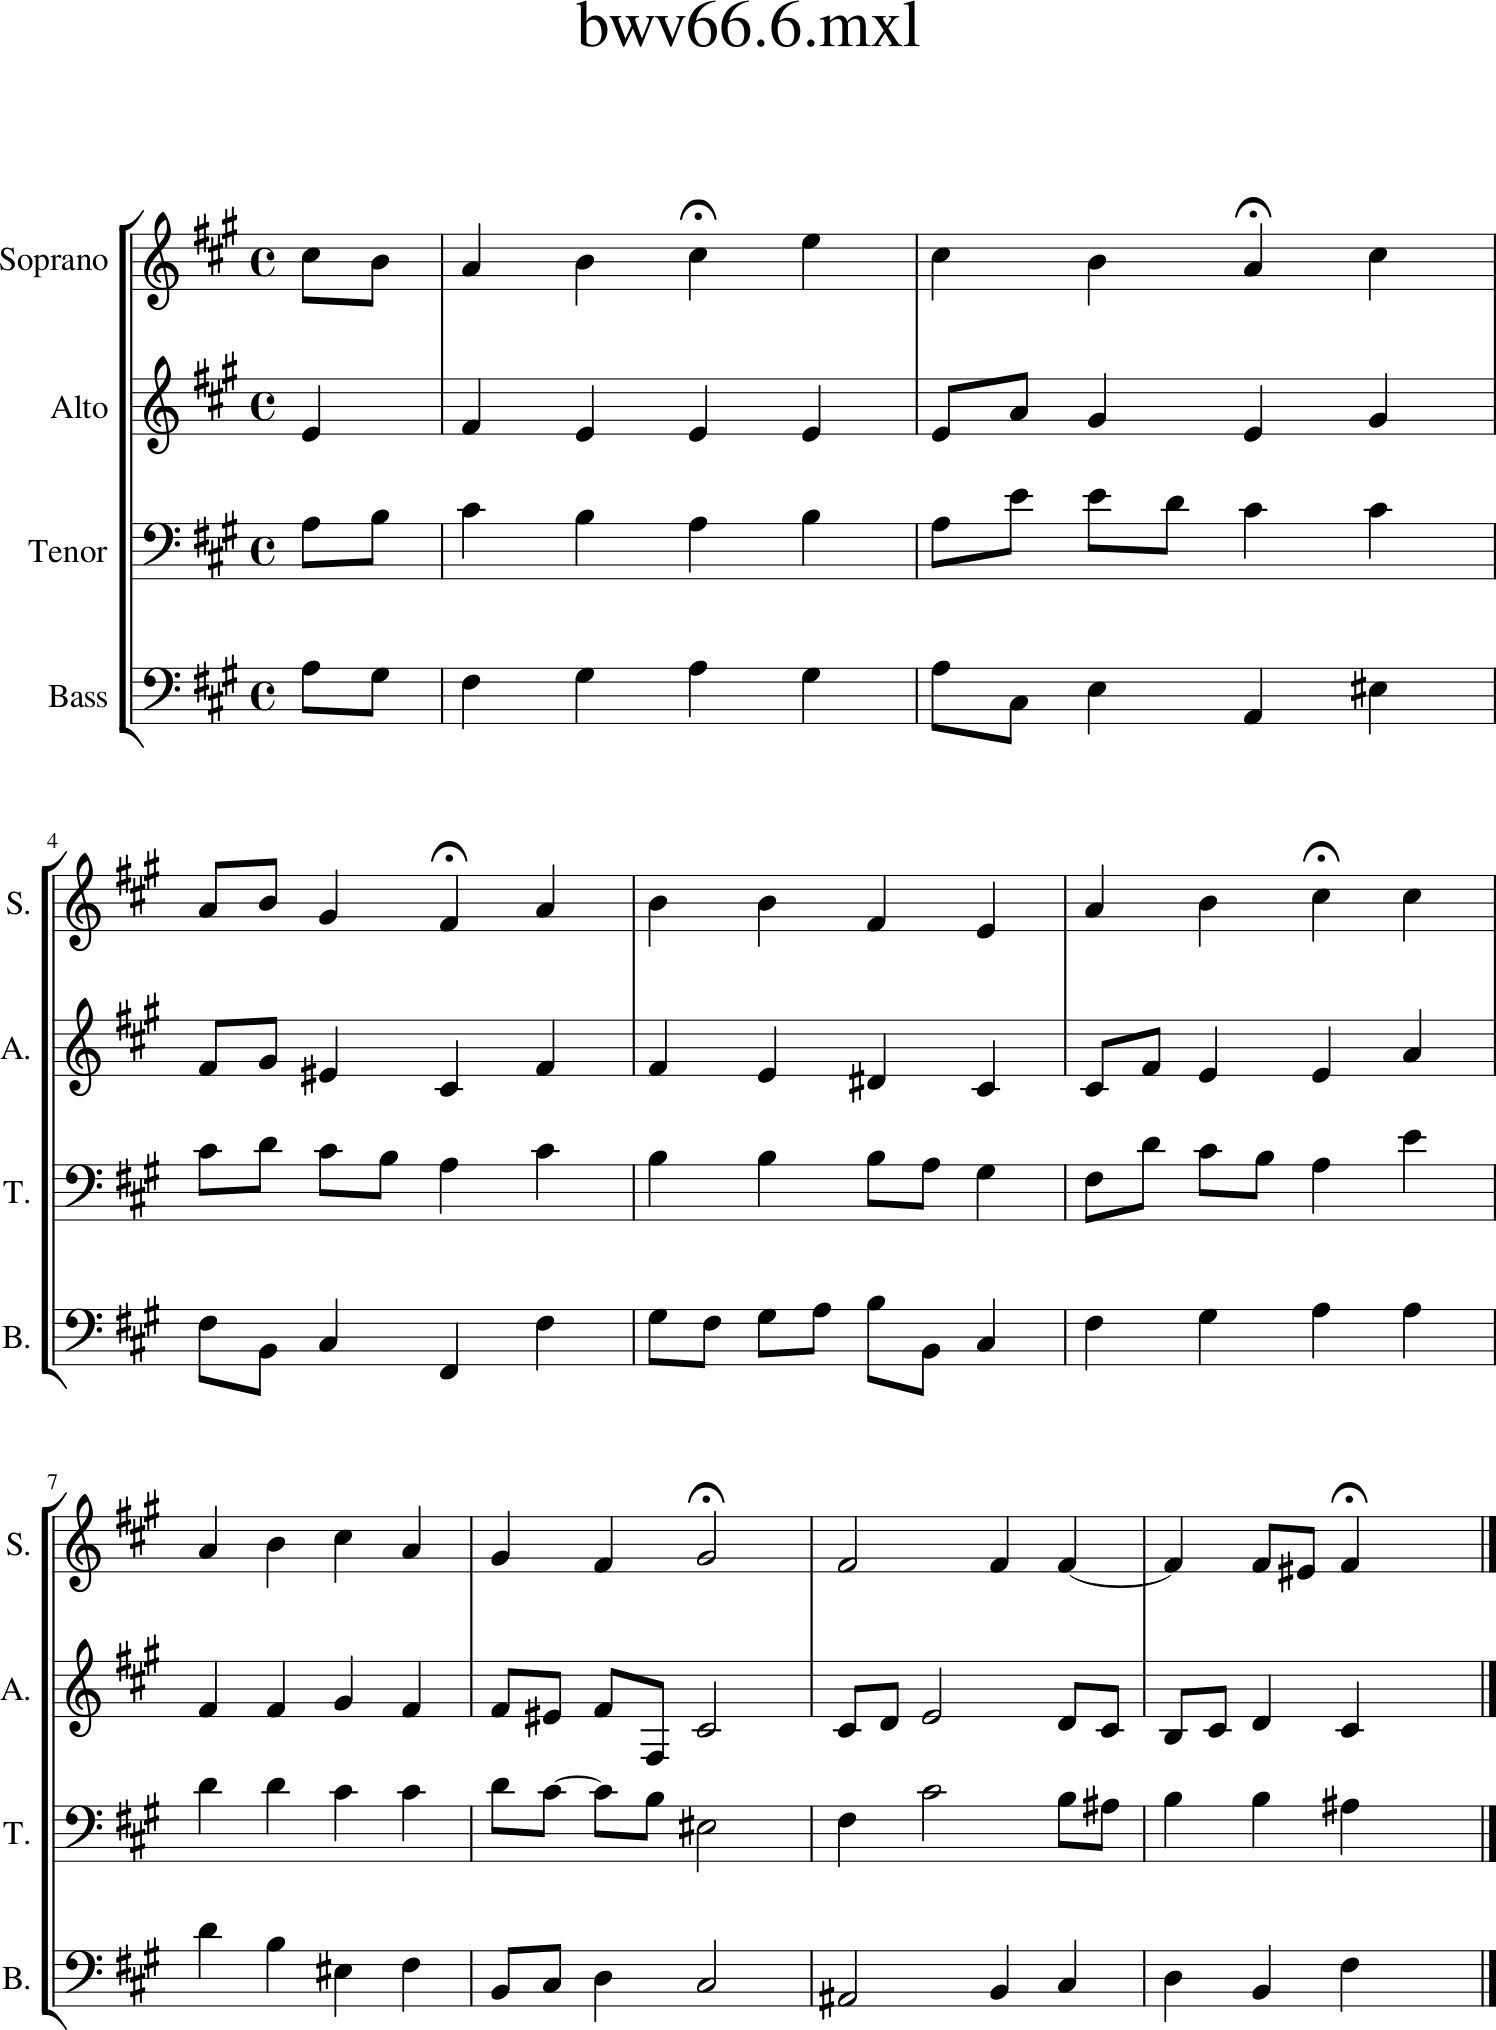

In [1]:
from music21 import *
b = corpus.parse('bach/bwv66.6')
b.show() # I've altered this so it's much shorter than it should be...

如果你在显示上述乐谱的过程中遇到了问题，请按如下方法解决：
* 你是否安装了Finale、Sibelius或MuseScore中的一款软件？免费试用版的Finale也行。
* 前往[https://www.finalemusic.com/products/notepad/](https://www.finalemusic.com/products/notepad/)或[https://musescore.org/](https://musescore.org/)下载。

只要你有了上述三款软件中的任意一款，我们就能继续。（`music21`可以使用lilypond显示乐谱，但是更难配置。因此建议使用Finale或MuseScore）

运行以下命令（在`from music21 import *`之后）

In [2]:
#configure.run()

你可以对所有"Yes/No"的选项选择"No"，但是请确保music21找到了你的Musescore，Finale或Sibelius。

## 文件解析总览
可以用`music21.converter.parse()`解析硬盘上的文件。通常返回`Score`对象，但是有时也返回`Part`（如果文件格式只支持单个音轨）或`Opus`（如果文件格式包含多个乐谱）。

In [3]:
#c = converter.parse('/Users/cuthbert/Desktop/myXML.xml')

如果你使用Windows系统，那么你既可以使用正斜杠`/`

In [4]:
#c = converter.parse('C:/Users/cuthbert/Desktop/myXML.xml')

也可以使用反斜杠，但需在文件名前加一个`r`，以关闭字符串转义

In [5]:
#c = converter.parse(r'C:\Users\cuthbert\Desktop\myXML.xml')

`parse()`支持相对路径。如果你当前命令行在文件所在的目录下，可以直接使用文件名。（例如，如果你在`/Users/cuthbert`目录下，你可以直接使用`'Desktop/myXML.xml'`）

如果你想加载的文件在网上，可以向`music21.converter.parse()`输入文件的URL。在正确的music21设置下（将在[第24章](24.ipynb)介绍），将自动下载文件并解析。

> 译者注：由于安全原因，music21默认不允许加载在线文档，建议将文档手动下载到本地再解析。如果仍想直接加载在线文档，请使用`environment.set('autoDownload', 'allow')`以允许加载在线文档。

In [6]:
#url = 'http://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
#sAlt = converter.parse(url)
#sAlt.measures(1, 5).show() # show first 5 measures

通常，music21会通过文件扩展名自动判断文件格式。但如果没有文件扩展名，或者扩展名错误，你仍然可以使用`format`参数手动指定文件格式

In [7]:
#c = converter.parse('/Users/cuthbert/Desktop/myXML', format='musicxml')

随着使用的深入，你将注意到，当你第二次加载同一个文件时，速度会快2~5倍。这是因为music21会在第一次加载时缓存一个优化版的文件。当第二次加载时，如果原文件没有修改，则将加载优化版的文件

对于大部分用户，这套加载流程完全不会出错。但是如果你做了一些奇怪的操作（例如修改了文件，但没有更新它的修改时间），或者开发调试music21解析器，可以使用`forceSource=True`参数以强制加载原文件。

In [8]:
#c = converter.parse('/Users/cuthbert/Desktop/myXML.xml', forceSource=True)

顺便说一下，如果你看到了基于旧版`music21`开发的代码，你可能会看到`parseWork`。它和`parse`的功能完全一样。因此，当你看到`parseWork`时，使用`parse`即可。

## music21支持的文件格式
music21支持多种文件格式的读写。其中，有些格式是难以解析的，有些格式则是国际标准。`converter.Converter`对象提供文件格式的列表。以下是music21支持导入的文件格式：

In [9]:
converter.Converter().subconvertersList('input')

[music21.converter.subConverters.ConverterABC,
 music21.converter.subConverters.ConverterCapella,
 music21.converter.subConverters.ConverterClercqTemperley,
 music21.converter.subConverters.ConverterHumdrum,
 music21.converter.subConverters.ConverterMEI,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMuseData,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterNoteworthy,
 music21.converter.subConverters.ConverterNoteworthyBinary,
 music21.converter.subConverters.ConverterRomanText,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterTinyNotation,
 music21.converter.subConverters.ConverterVolpiano]

以下是music21支持导出的文件格式

In [10]:
converter.Converter().subconvertersList('output')

[music21.converter.subConverters.ConverterBraille,
 music21.converter.subConverters.ConverterLilypond,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterRomanText,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterText,
 music21.converter.subConverters.ConverterTextLine,
 music21.converter.subConverters.ConverterVexflow,
 music21.converter.subConverters.ConverterVolpiano]

要导出一个文件，调用`Stream.show(格式名称)`显示文件（其中格式名称可以是`musicxml`、`braille`、`midi`等），或者用`Stream.write(格式名称,文件名)`将文件保存到硬盘上。

部分支持的格式如下：首先是基本格式`braille`、`lilypond`、`midi`、`musicxml`、`scala`、`text`和`vexflow`

有的格式还有子格式。例如`musicxml`和`lilypond`有子格式`.png`，会把导出的乐谱文件渲染为`.png`图片，可通过`.show("musicxml.png")`调用。

有的格式有缩写。例如`musicxml`的缩写是`xml`，`lilypond`的缩写是`lily`，`text`的缩写是`t`

## MusicXML文件
MusicXML文件可在以下两个网站查找：
* [https://musescore.com/](https://musescore.com/)
* [https://www.gutenberg.org/](https://www.gutenberg.org/)

MusicXML文件的扩展名有时是`.xml`，有时是`.mxl`。通常后者表示该文件是压缩的MusicXML。在music21中，可使用相同的方法加载它们。

## Humdrum文件
Humdrum文件是由俄亥俄州立大学的David Huron开发的一种文件格式，适合计算机分析。Humdrum格式包含许多子格式。其中，music21支持Humdrum基本格式、`kern`格式，以及`dynam`动态格式。

解析Humdrum文件和解析其他数据格式一样，只需调用`music21.converter.parse`函数，输入文件路径或URL即可。

In [11]:
#sBach = converter.parse('http://kern.ccarh.org/cgi-bin/ksdata?l=users/craig/classical/bach/cello&file=bwv1007-01.krn&f=kern')

超过100,000个Kern文件可以在以下网站找到：

[http://kern.humdrum.org/](http://kern.humdrum.org/)

## ABC文件
ABC是一种能编码多种音乐类型的文本格式，但它尤其适用于单声部歌曲，例如民谣。如果你主要研究民谣音乐，那么你一定会爱上ABC格式。

解析ABC文件和解析其他数据格式一样，只需调用`music21.converter.parse`函数，输入文件路径或URL即可。

In [12]:
#o = converter.parse('/Users/cuthbert/Documents/Music21/praludium.abc')

许多网站提供ABC文件。以下是其中的几个：

[https://abcnotation.com](https://abcnotation.com)

[http://www.serpentpublications.org/drupal7/](http://www.serpentpublications.org/drupal7/)

## ABC乐谱集文件
许多ABC文件包含多个完整的乐谱。导入这些ABC文件时，将返回`Opus`对象。`Opus`是`Stream`的一个子类，为管理多个乐谱对象提供了方便的方法。例如：

In [13]:
o = corpus.parse('josquin/ovenusbant')
o

<music21.stream.Opus 0x28226f0ca00>

乐谱集中的乐谱编号（例如ABC中的"X:"标签）存储在每个乐谱中的`Metadata`对象中，可通过`music21.stream.Opus.getNumbers()`函数获取。除此之外，也可以使用`getScoreByNumber()`通过编号查找乐谱。

In [14]:
o = corpus.parse('josquin/ovenusbant')
o.getNumbers()

['1', '2', '3']

In [15]:
s = o.getScoreByNumber(2)
s.metadata.title

'O Venus bant'

使用`getScoreByNumber()`通过标题查找乐谱。

In [16]:
o = corpus.parse('essenFolksong/erk5')
s = o.getScoreByTitle('Vrienden, kommt alle gaere')
s

<music21.stream.Score 0x28236d121c0>

In [17]:
s.metadata.title

'Vrienden, kommt alle gaere'

部分ABC文件，例如`corpus/essenFolksong`中的ABC文件包含上百首甚至上千首乐谱。上述方法会将全部乐谱解析为music21对象，然后选取所需的乐谱，可能会很慢。可以向`converter.parse()`或`corpus.parse()`传入`number`参数来指定需要解析的乐谱。将会返回`Score`对象。

In [18]:
s = corpus.parse('essenFolksong/erk5', number=2)
s

<music21.stream.Score 0x282352fa3a0>

## ABC单音轨乐谱集文件
有时A，BC文件中会将每一条音轨单独存成一个乐谱，有点像文艺复兴时期的partbook。解析这些文件时，可以使用`music21.stream.Opus.mergeScores()`函数将所有乐谱合并在一起。

例如：Josquin的《Mille Regretz》

In [19]:
o = corpus.parse('josquin/milleRegrets')
len(o.scores)

4

In [20]:
len(o.scores[0].parts)

1

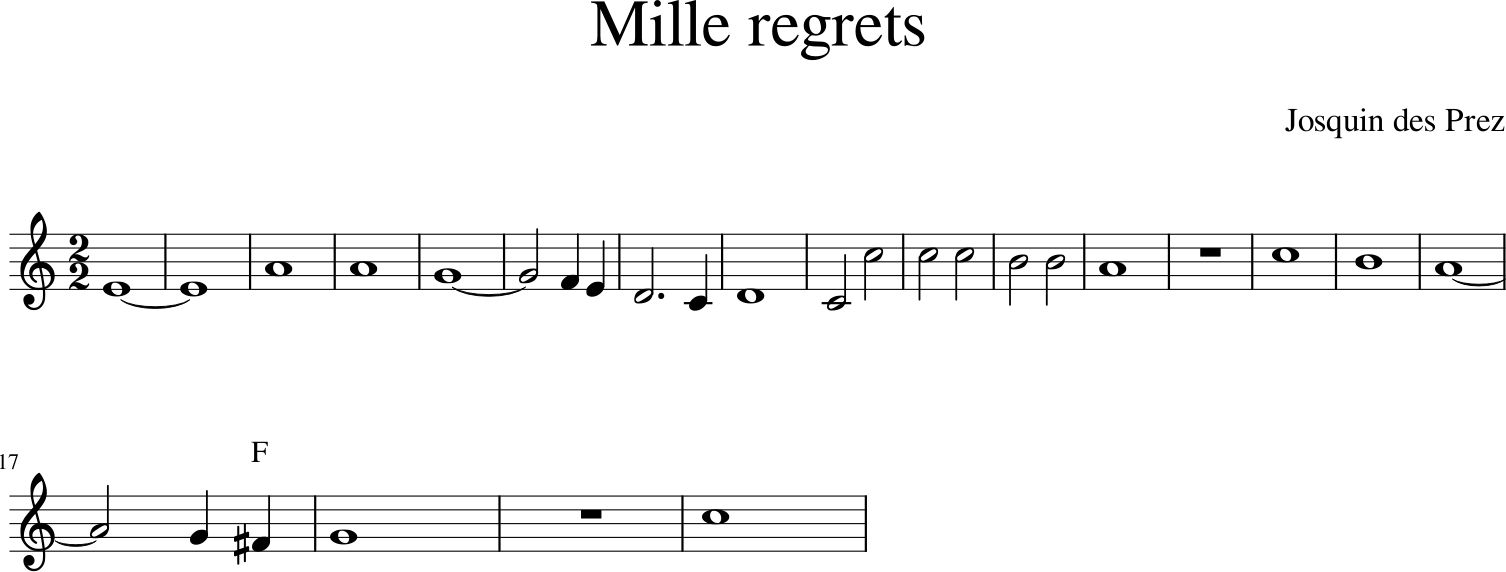

In [21]:
#原文为o.scores[0].measures(1, 20).show()，会得到错误的输出
#需要调用makeMeasures()以划分小节
o.scores[0].makeMeasures().measures(1, 20).show()

使用`mergeScores`函数，合并为拥有四个音轨的乐谱

In [22]:
s = o.mergeScores()
s.metadata.title

'Mille regrets'

In [23]:
len(s.parts)

4

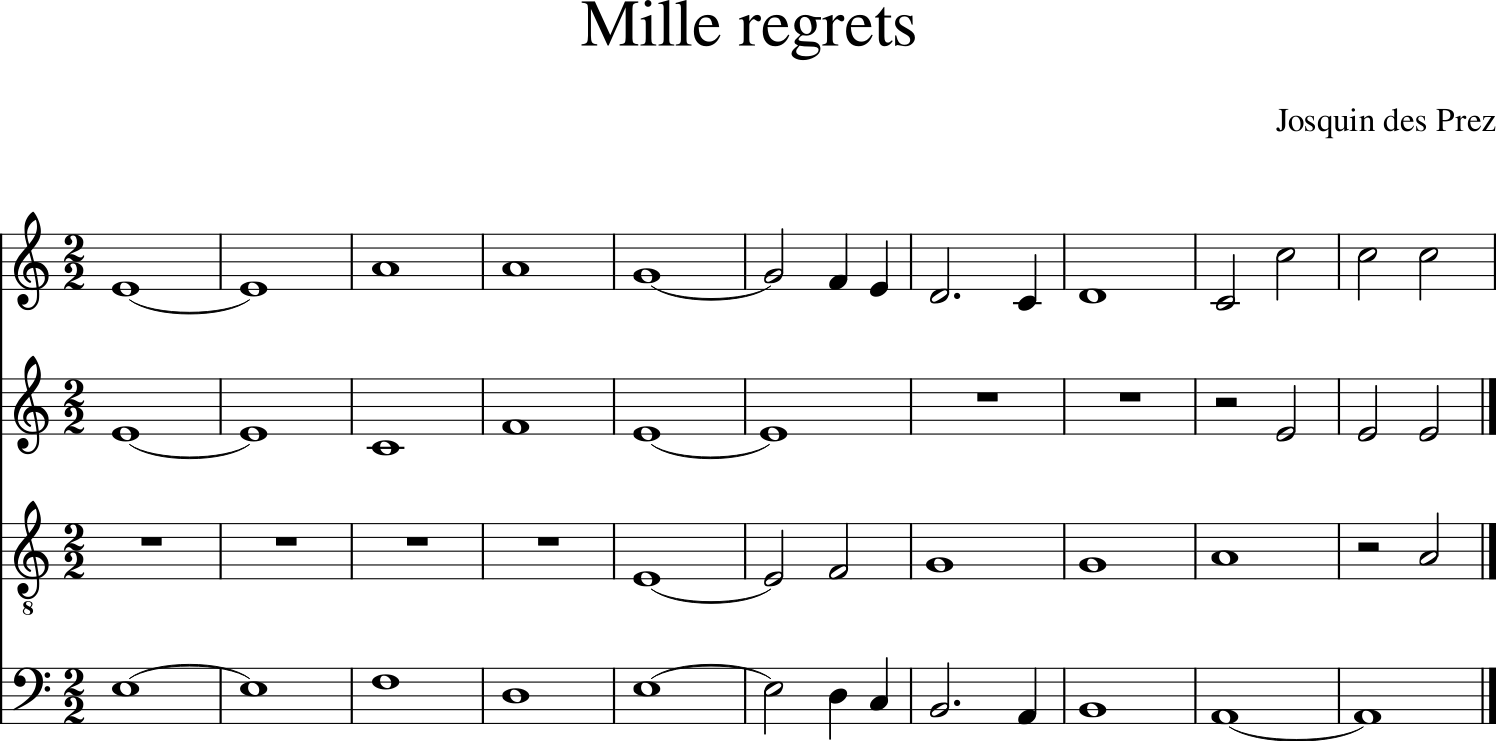

In [24]:
s.measures(1, 10).show()

## Musedata文件
Musedata是Walter Hewlett（是的，就是惠普家族的那个）于1980年代设计的格式，对内存友好。它可能不是对现代计算机最好的格式，但是有许多音乐数据以这种格式存储。

阶段1（limited encoding）和阶段2（rich encoding）的Musedata文件都受music21支持。多轨Musedata文件、压缩包，以及每个音轨单独存放的文件夹都可以用`music21.converter.parse()`解析。

Note that access restrictions prevent demonstrating Musedata conversion. Downloading or using Musedata files requires sending a written access agreement to the owners.

## MIDI文件
MIDI文件的输入与输出和其他格式类似，只需使用`music21.converter.parse`函数，输入文件的路径或URL即可。

注意（如果你还不知道的话）：MIDI文件不包含关于异名等音的信息（`C#`和`D-`不做区分），检测音符长度也很困难。`Music21`对于从乐谱编辑软件中导出的MIDI文件处理得很好，但是键盘录制的MIDI文件就比较麻烦了。对于这些文件，我们建议先在Finale等乐谱编辑软件中将它转为MusicXML格式，再导入music21。
## 总结
music21的一个核心优势就是它能读写多种文件格式。有些用户使用music21不为别的，专门把它当作数字乐谱领域的“格式工厂”来使用。我们为此感到很高兴。但是，music21的能力远远不止于此。

下一章：[用户指南，第9章：和弦化](09.ipynb)